In [ ]:
Using The Guardian API, this project compares the all the headlines about COVID between Australia and the UK 
in the first Quarter of 2021.

In [3]:
# import libraries for this question here
import requests
import json
from datetime import datetime
import pandas as pd

### 2.2 Data

In [4]:
# Access the data via API
# Clean/prepare the data for analysis
# url='https://content.guardianapis.com/search?production-office=UK&from-date=2021-01-01&q=sars-cov-2%20or%20covid&api-key=7543a311-cd3a-4e89-b3c9-05a1c027fe0e'
url='https://content.guardianapis.com/search?production-office=UK&from-date=2021-01-01&q=sars-cov-2%20or%20covid&api-key=007143a4-82ab-4809-9ae9-a852824d1df6'

df = pd.read_json(url)
df_nested_list = pd.json_normalize(df['response']['results'])
df_nested_list.head(10)

,id,type,sectionId,sectionName,webPublicationDate,webTitle,webUrl,apiUrl,isHosted,pillarId,pillarName
0,environment/2021/mar/10/deadly-pig-disease-cou...,article,environment,Environment,2021-03-10T07:15:18Z,Deadly pig disease could have led to Covid spi...,https://www.theguardian.com/environment/2021/m...,https://content.guardianapis.com/environment/2...,False,pillar/news,News
1,commentisfree/2021/feb/14/is-covid-more-deadly...,article,theobserver,From the Observer,2021-02-14T07:15:35Z,Is Covid more deadly and contagious than seaso...,https://www.theguardian.com/commentisfree/2021...,https://content.guardianapis.com/commentisfree...,False,pillar/news,News
2,world/2021/apr/01/almost-third-of-uk-covid-hos...,article,world,World news,2021-04-01T05:00:04Z,Almost third of UK Covid hospital patients rea...,https://www.theguardian.com/world/2021/apr/01/...,https://content.guardianapis.com/world/2021/ap...,False,pillar/news,News
3,world/2021/mar/11/israeli-real-world-data-on-p...,article,world,World news,2021-03-11T15:02:08Z,Israeli real-world data on Pfizer vaccine show...,https://www.theguardian.com/world/2021/mar/11/...,https://content.guardianapis.com/world/2021/ma...,False,pillar/news,News
4,world/2021/apr/15/garlic-breath-distancing-exp...,article,world,World news,2021-04-15T09:46:08Z,Use ‘garlic-breath distancing’ to stay Covid-s...,https://www.theguardian.com/world/2021/apr/15/...,https://content.guardianapis.com/world/2021/ap...,False,pillar/news,News
5,science/2021/mar/21/vets-warn-new-covid-varian...,article,science,Science,2021-03-21T12:58:54Z,Vets warn of new Covid variant’s possible link...,https://www.theguardian.com/science/2021/mar/2...,https://content.guardianapis.com/science/2021/...,False,pillar/news,News
6,commentisfree/2021/feb/08/the-guardian-view-on...,article,commentisfree,Opinion,2021-02-08T19:23:02Z,The Guardian view on coexisting with Covid: ne...,https://www.theguardian.com/commentisfree/2021...,https://content.guardianapis.com/commentisfree...,False,pillar/opinion,Opinion
7,world/2021/feb/04/test-and-trace-must-be-led-b...,article,world,World news,2021-02-04T18:30:38Z,Test and trace must be led by experts | Letter,https://www.theguardian.com/world/2021/feb/04/...,https://content.guardianapis.com/world/2021/fe...,False,pillar/news,News
8,environment/2021/feb/18/mink-farms-a-continuin...,article,environment,Environment,2021-02-18T10:00:30Z,Mink farms a continuing Covid risk to humans a...,https://www.theguardian.com/environment/2021/f...,https://content.guardianapis.com/environment/2...,False,pillar/news,News
9,world/2021/mar/19/doctors-suggest-link-between...,article,world,World news,2021-03-19T08:15:27Z,Doctors suggest Covid-19 could cause diabetes,https://www.theguardian.com/world/2021/mar/19/...,https://content.guardianapis.com/world/2021/ma...,False,pillar/news,News


### 2.3 Analysis

In [5]:
# Analyse the data - ensure that you at least use the required technique
appended_dataUK = []
url='https://content.guardianapis.com/search?production-office=UK&from-date=2021-01-01&page=1&q=sars-cov-2%20or%20covid&api-key=7543a311-cd3a-4e89-b3c9-05a1c027fe0e'
dfUK = pd.read_json(url)
# dfUK.head(10)
no_pages=dfUK['response']['pages']
for x in range(1,no_pages+1):
    url='https://content.guardianapis.com/search?production-office=UK&from-date=2021-01-01&page='+str(x)+'&q=sars-cov-2%20or%20covid&api-key=7543a311-cd3a-4e89-b3c9-05a1c027fe0e'
    df = pd.read_json(url)
    df_nested_list = pd.json_normalize(df['response']['results'])
    appended_dataUK.append(df_nested_list)
    
appended_dataUK = pd.concat(appended_dataUK) 

In [12]:
uk_data=appended_dataUK[['type','sectionName','webPublicationDate','pillarName']]
uk_data['Article Date']=list(map(lambda x: datetime.strptime(x,'%Y-%m-%dT%H:%M:%SZ').strftime('%d/%m/%Y'), uk_data['webPublicationDate']))
uk_data['Country']='UK'
uk_daily_reports=uk_data.groupby(uk_data['Article Date']).count()


<ipython-input-12-c7d74406b703>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uk_data['Article Date']=list(map(lambda x: datetime.strptime(x,'%Y-%m-%dT%H:%M:%SZ').strftime('%d/%m/%Y'), uk_data['webPublicationDate']))
<ipython-input-12-c7d74406b703>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uk_data['Country']='UK'


In [9]:
appended_data = []
url='https://content.guardianapis.com/search?production-office=AUS&from-date=2021-01-01&page=1&q=sars-cov-2%20or%20covid&api-key=7543a311-cd3a-4e89-b3c9-05a1c027fe0e'
dfAUS = pd.read_json(url)
# dfUK.head(10)
no_pagesAus=dfAUS['response']['pages']
for x in range(1,no_pagesAus+1):
    url='https://content.guardianapis.com/search?production-office=AUS&from-date=2021-01-01&page='+str(x)+'&q=sars-cov-2%20or%20covid&api-key=7543a311-cd3a-4e89-b3c9-05a1c027fe0e'
    df1 = pd.read_json(url)
    df_nested_listAUS = pd.json_normalize(df1['response']['results'])
    appended_data.append(df_nested_listAUS)

appended_data = pd.concat(appended_data)  

In [10]:
aus_data=appended_data[['type','sectionName','webPublicationDate','pillarName']]
aus_data['Article Date']=list(map(lambda x: datetime.strptime(x,'%Y-%m-%dT%H:%M:%SZ').strftime('%d/%m/%Y'), aus_data['webPublicationDate']))
aus_data['Country']='AUS'
aus_daily_reports=aus_data.groupby(aus_data['Article Date']).count()


<ipython-input-10-4c07a3899a03>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aus_data['Article Date']=list(map(lambda x: datetime.strptime(x,'%Y-%m-%dT%H:%M:%SZ').strftime('%d/%m/%Y'), aus_data['webPublicationDate']))
<ipython-input-10-4c07a3899a03>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aus_data['Country']='AUS'


### 2.4 Visualisation

<AxesSubplot:xlabel='Country'>

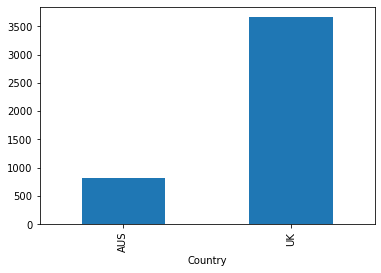

In [13]:
# Visualise the results
df_combined=[]
df_combined.append(aus_data)
df_combined.append(uk_data)
df_combined = pd.concat(df_combined) 
articles_per_country=df_combined.groupby(df_combined['Country'])['type'].count()
articles_per_country
articles_per_country.plot.bar()

### 2.5 Insight

In [29]:
The UK has many more headlines on COVID compared to Australia. 